In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
# from keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import random
import os
import matplotlib.pyplot as plt
import numpy as np

##### Directory of folder

In [33]:
train_dir='dog-cat-full-dataset-master/data/train'
test_dir='dog-cat-full-dataset-master/data/test'

##### Directory of cats and dogs

In [32]:
# train_cat='dog-cat-full-dataset-master/data/train/cats'
# train_dog='dog-cat-full-dataset-master/data/train/dogs'
# test_cat='dog-cat-full-dataset-master/data/test/cats'
# test_dog='dog-cat-full-dataset-master/data/test/dogs'
train_cat = os.path.join(train_dir, 'cats')
train_dog = os.path.join(train_dir, 'dogs')
test_cat = os.path.join(test_dir, 'cats')
test_dog = os.path.join(test_dir, 'dogs')
print('Train cat size:',len([name for name in os.listdir(train_cat)]))
print('Train dog size:',len([name for name in os.listdir(train_dog)]))
print('Test cat size:',len([name for name in os.listdir(test_cat)]))
print('Test dog size:',len([name for name in os.listdir(test_dog)]))

Train cat size: 10000
Train dog size: 9989
Test cat size: 2500
Test dog size: 2500


## **Cat** 🐈

Image's name: cat.4122.jpg


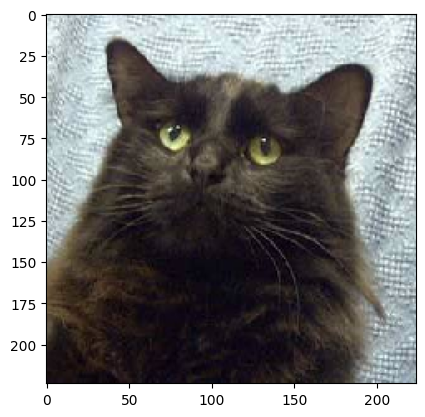

In [68]:
filename=os.listdir(train_cat)
sample=random.choice(filename)
image=load_img(os.path.join(train_cat,sample),target_size=(224,224))    
print(f"Image's name: {sample}")
plt.imshow(image);

Cat image files: ['cat.4801.jpg', 'cat.6641.jpg', 'cat.5316.jpg', 'cat.5727.jpg', 'cat.4013.jpg', 'cat.9903.jpg', 'cat.8747.jpg', 'cat.11211.jpg', 'cat.10546.jpg']


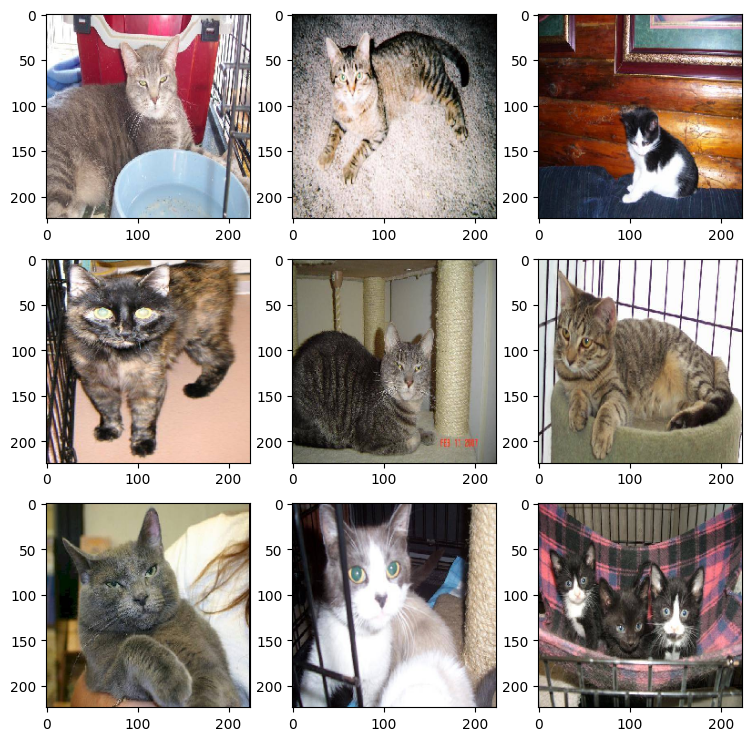

In [66]:
filename=os.listdir(train_cat)
filename=random.sample(filename,9)
print(f'Cat image files: {filename}')
plt.figure(figsize=(9,9))
for i,im in enumerate(filename):
    plt.subplot(3,3,i+1)
    image=load_img(os.path.join(train_cat,im),target_size=(224,224))
    plt.imshow(image)
    # print(f"Image's name: {im}")

## **Dog**  🐕

Dog image files: ['dog.6977.jpg', 'dog.5032.jpg', 'dog.3187.jpg', 'dog.6983.jpg', 'dog.6913.jpg', 'dog.7146.jpg', 'dog.2076.jpg', 'dog.7518.jpg', 'dog.10999.jpg']


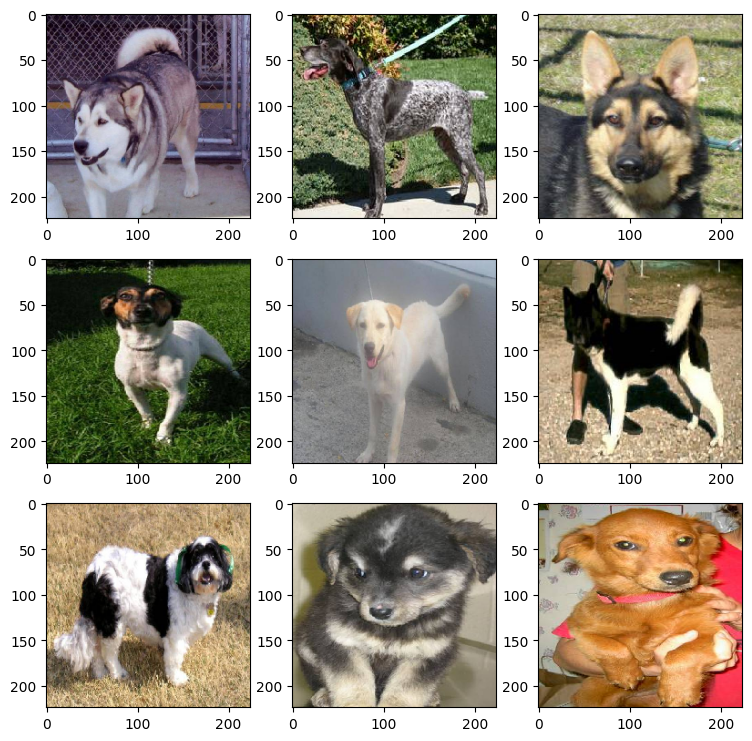

In [67]:
filename=os.listdir(train_dog)
filename=random.sample(filename,9)
print(f'Dog image files: {filename}')
plt.figure(figsize=(9,9))
for i,im in enumerate(filename):
    plt.subplot(3,3,i+1)
    image=load_img(os.path.join(train_dog,im),target_size=(224,224))
    plt.imshow(image)
    # print(f"Image's name: {im}")

##### Prepare data before modeling

In [69]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 15992 images belonging to 2 classes.
Found 3997 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [87]:
# model=models.Sequential([
#     layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Conv2D(128,(3,3),activation='relu'),
#     layers.MaxPool2D(2,2),
#     layers.Flatten(),
#     layers.Dense(512,activation='relu'),
#     layers.Dense(1,activation='sigmoid')  # Binary classification
# ])
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.summary()

In [88]:
# model.fit(train_generator,validation_data=val_generator,epochs=10)
# loss,accuracy=model.evaluate(test_generator)
# print('Test Accuracy:',accuracy)

In [89]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.fit(train_generator,validation_data=val_generator,epochs=3)
loss,accuracy=model.evaluate(test_generator)
print('Test Accuracy:',accuracy)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 188s 375ms/step - accuracy: 0.5804 - loss: 0.7614 - val_accuracy: 0.6880 - val_loss: 0.5929
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 196s 391ms/step - accuracy: 0.7349 - loss: 0.5406 - val_accuracy: 0.7516 - val_loss: 0.5098
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 395ms/step - accuracy: 0.8039 - loss: 0.4121 - val_accuracy: 0.7791 - val_loss: 0.4736
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.7842 - loss: 0.4787
Test Accuracy: 0.7770000100135803


##### Predict and visualize the images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


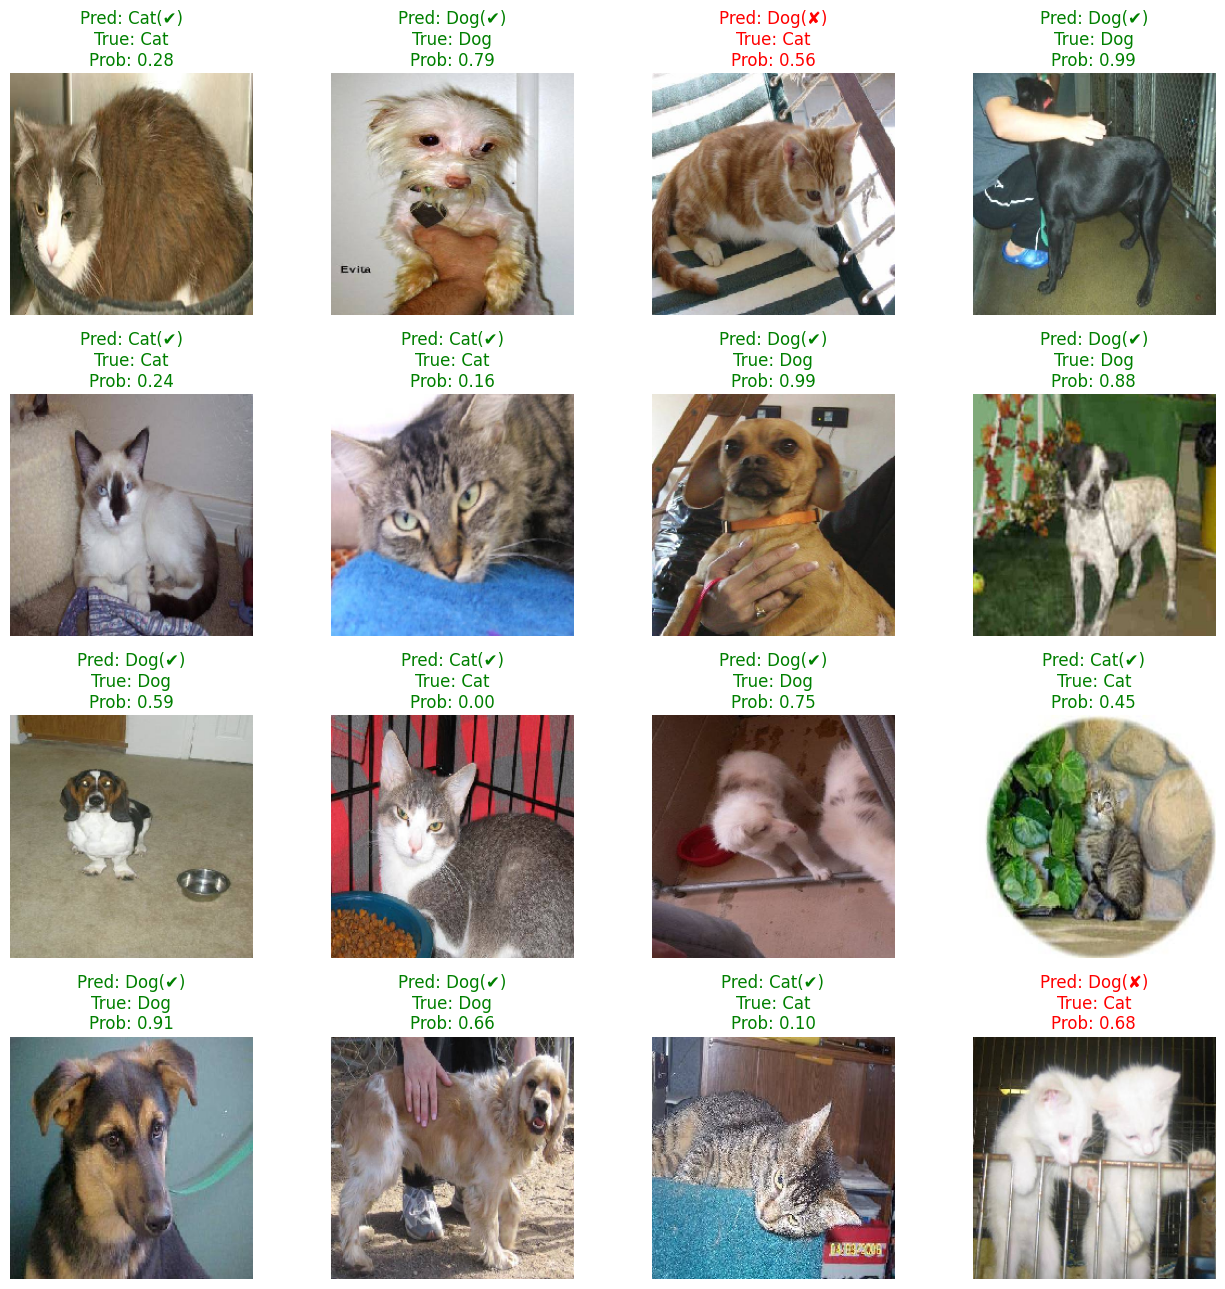

In [92]:
cat_img=random.sample(os.listdir(test_cat),8)
dog_img=random.sample(os.listdir(test_dog),8)
test_img=[(os.path.join(test_cat,f),'Cat') for f in cat_img] + [(os.path.join(test_dog,f),'Dog') for f in dog_img]
random.shuffle(test_img)  # Mix them
plt.figure(figsize=(13,13))
# plot and predict
for i, (img_path,true_label) in enumerate(test_img):
    img=load_img(img_path,target_size=(224,224))
    img_array=img_to_array(img)/255.0  #Normalize the image
    img_array=np.expand_dims(img_array,axis=0)  # Shape: (1,224,224,3)

    prediction=model.predict(img_array)[0][0]  # Sigmoid output
    pred_label='Dog' if prediction>0.5 else 'Cat'
    correct=(pred_label==true_label)

    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')
    # plt.title(f"Pred: {pred_label} ({'✅' if correct else '❌'})\nTrue: {true_label}\nProb: {prediction:.2f}")
    color='green' if correct else 'red'
    # plt.title(f"Pred: {pred_label}\nTrue: {true_label}\nProb: {prediction:.2f}",color=color)
    status = "✔" if correct else "✘"
    plt.title(f"Pred: {pred_label}({status})\nTrue: {true_label}\nProb: {prediction:.2f}",color=color)

plt.tight_layout()
plt.show()


##### Threshold

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

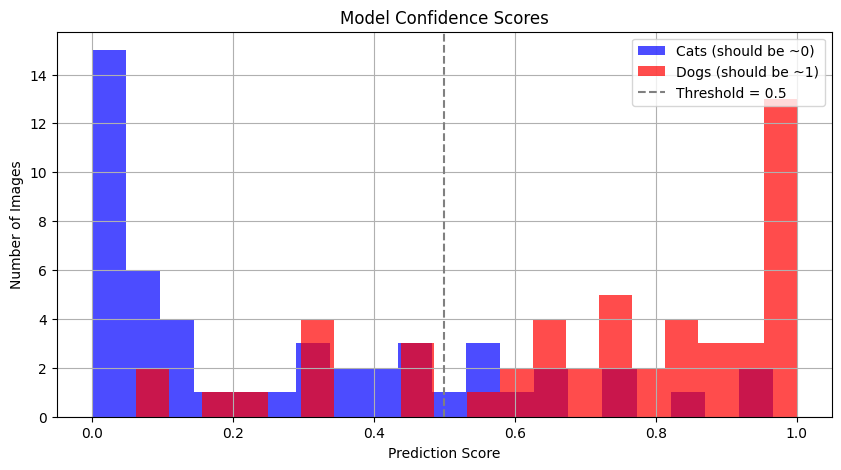

In [93]:
import numpy as np
import matplotlib.pyplot as plt

cat_scores = []  # store model predictions for cat images
dog_scores = []  # store model predictions for dog images

# Load and predict on a few images (e.g., 50 each)
for filename in os.listdir(test_cat)[:50]:
    img = load_img(os.path.join(test_cat, filename), target_size=(224, 224))
    arr = img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    score = model.predict(arr)[0][0]
    cat_scores.append(score)

for filename in os.listdir(test_dog)[:50]:
    img = load_img(os.path.join(test_dog, filename), target_size=(224, 224))
    arr = img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    score = model.predict(arr)[0][0]
    dog_scores.append(score)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(cat_scores, bins=20, alpha=0.7, label='Cats (should be ~0)', color='blue')
plt.hist(dog_scores, bins=20, alpha=0.7, label='Dogs (should be ~1)', color='red')
plt.axvline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
plt.title('Model Confidence Scores')
plt.xlabel('Prediction Score')
plt.ylabel('Number of Images')
plt.legend()
plt.grid(True)
plt.show()
